### Corremos un xgboost

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [4]:
df_model_xgb = pd.read_csv(r"../data/final//modelling/df_model_xgb_rf.csv")


# Crear el nuevo DataFrame sin valores faltantes

df_model_xgb = df_model_xgb.dropna()
df_model_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24522 entries, 0 to 25168
Columns: 157 entries, status_inf to ratiodep
dtypes: bool(146), float64(5), int64(6)
memory usage: 5.7 MB


c:\Users\sergio.cuadros\miniconda3\envs\xgbenv311\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:26:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

     Clase 0     0.8441    0.9591    0.8979      4031
     Clase 1     0.4923    0.1831    0.2669       874

    accuracy                         0.8208      4905
   macro avg     0.6682    0.5711    0.5824      4905
weighted avg     0.7814    0.8208    0.7855      4905

XGBoost (sin rebalanceo) - Accuracy: 0.821, AUC-ROC: 0.571, F1: 0.267


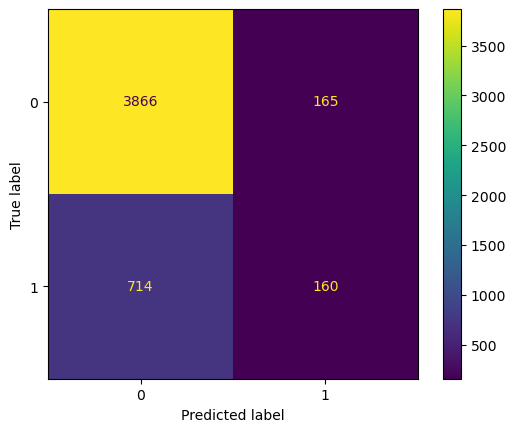

In [5]:
# XGBoost sin rebalanceo

X = df_model_xgb.drop(columns=['status_inf'])
y = df_model_xgb['status_inf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], digits=4)
print(report)

# Calcular las métricas
accuracy_xgb = accuracy_score(y_test, y_pred)
auc_roc_xgb = roc_auc_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

# Imprimir los resultados
print(f"XGBoost (sin rebalanceo) - Accuracy: {accuracy_xgb:.3f}, AUC-ROC: {auc_roc_xgb:.3f}, F1: {f1_xgb:.3f}")


4.612875536480686


c:\Users\sergio.cuadros\miniconda3\envs\xgbenv311\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:27:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

     Clase 0     0.8779    0.7971    0.8355      4031
     Clase 1     0.3430    0.4886    0.4030       874

    accuracy                         0.7421      4905
   macro avg     0.6104    0.6428    0.6193      4905
weighted avg     0.7826    0.7421    0.7585      4905

XGBoost (sin rebalanceo) - Accuracy: 0.742, AUC-ROC: 0.643, F1: 0.403


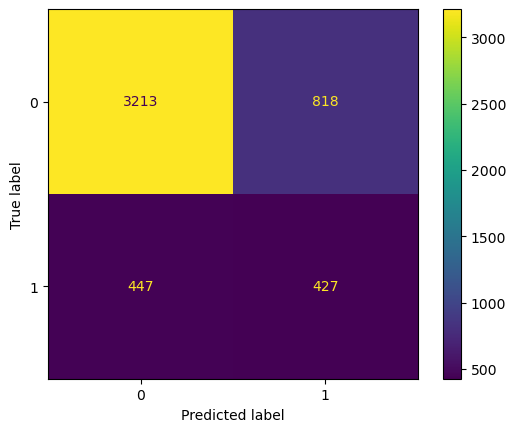

In [ ]:
# XGBoost con rebalanceo

X = df_model_xgb.drop(columns=['status_inf'])
y = df_model_xgb['status_inf']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(scale_pos_weight)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                      scale_pos_weight = scale_pos_weight)
model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], digits=4)
print(report)
# Calcular las métricas
accuracy_xgb = accuracy_score(y_test, y_pred)
auc_roc_xgb = roc_auc_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

# Imprimir los resultados
print(f"XGBoost (sin rebalanceo) - Accuracy: {accuracy_xgb:.3f}, AUC-ROC: {auc_roc_xgb:.3f}, F1: {f1_xgb:.3f}")

import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plotar la importancia de las características, mostrando solo las top 15 sin título
plot_importance(model, importance_type='weight', max_num_features=15, title=None)
plt.show()


c:\Users\sergio.cuadros\miniconda3\envs\xgbenv311\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan

=== Mejores hiperparámetros (GridSearch) ===
{'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 400, 'reg_lambda': 0.5, 'subsample': 0.8}


c:\Users\sergio.cuadros\miniconda3\envs\xgbenv311\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== Umbral seleccionado: 0.228 ===
(Usando umbral que maximiza F1 en test)

=== Classification Report (umbral ajustado) ===
              precision    recall  f1-score   support

     Clase 0     0.9046    0.6961    0.7868      4031
     Clase 1     0.3206    0.6613    0.4318       874

    accuracy                         0.6899      4905
   macro avg     0.6126    0.6787    0.6093      4905
weighted avg     0.8005    0.6899    0.7235      4905



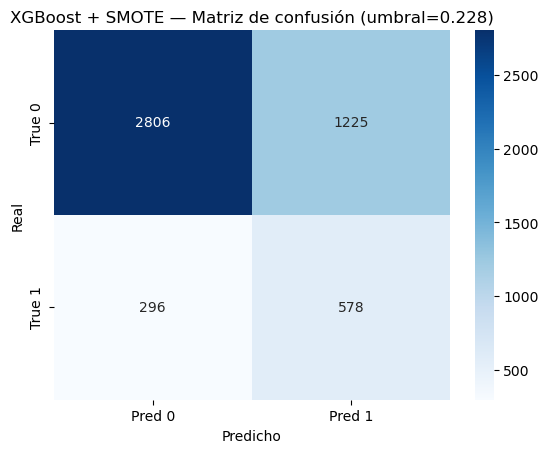

XGBoost + SMOTE (umbral=0.228) - Accuracy: 0.690, AUC-ROC: 0.746, AUC-PR: 0.388, F1: 0.432

Umbral que maximiza F1 (test): 0.228 — F1: 0.432


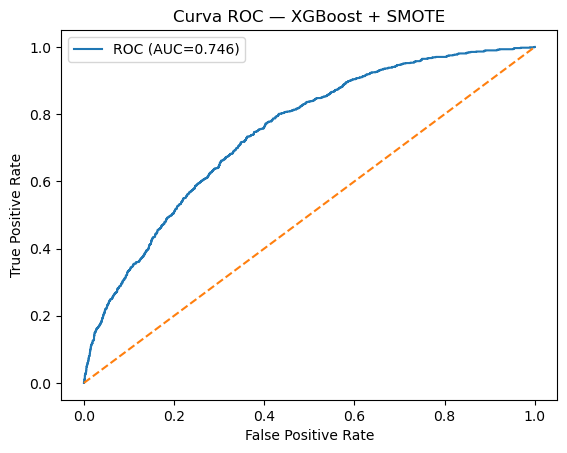

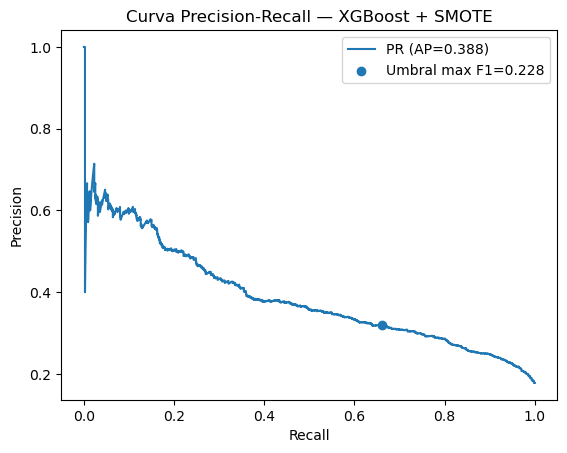

<Figure size 640x480 with 0 Axes>

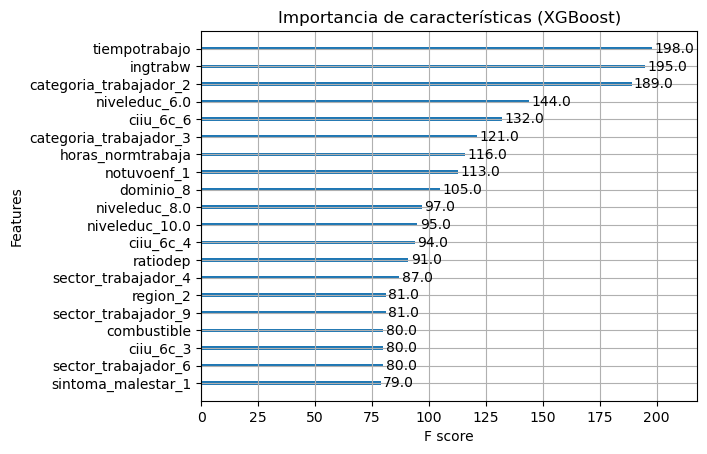

In [7]:
# XGBoost con SMOTE, GridSearch y ajuste de umbral
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score,
    f1_score, average_precision_score, precision_recall_curve, roc_curve
)
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# =========================
# 1) Split (estratificado)
# =========================
X = df_model_xgb.drop(columns=['status_inf'])
y = df_model_xgb['status_inf']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ======================================
# 2) SMOTE SOLO en el train (no en test)
# ======================================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# ============================================
# 3) GridSearchCV (pequeño) para XGBoost
#    -> optimizamos con average_precision (AUC-PR)
# ============================================
base_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='aucpr',     # métrica interna sensible a minoritarios
    random_state=42,
    n_estimators=600,        # valor base (puede cambiar por grid)
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0
)

param_grid = {
    "max_depth": [4, 5, 6],
    "learning_rate": [0.03, 0.05, 0.1],
    "n_estimators": [400, 600, 800],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
    "reg_lambda": [0.5, 1.0, 2.0]
}

grid = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='average_precision',  # AP (AUC-PR)
    cv=3,
    n_jobs=-1,
    verbose=0
)
grid.fit(X_train_res, y_train_res)

print("=== Mejores hiperparámetros (GridSearch) ===")
print(grid.best_params_)
model = grid.best_estimator_

# ============================
# 4) Entrenar con mejor modelo
# ============================
model.fit(X_train_res, y_train_res)

# ===================================================
# 5) Predicciones (probabilidades) y métricas básicas
# ===================================================
y_proba = model.predict_proba(X_test)[:, 1]

# Umbral 1: el que max F1 en test (data-driven)
prec, rec, thr = precision_recall_curve(y_test, y_proba)
f1s = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_thr = thr[best_idx] if best_idx < len(thr) else 0.5

# Umbral 2 (opcional): cumplir recall objetivo con precisión mínima
def find_threshold_for_targets(y_true, y_score, recall_target=0.70, precision_min=0.40):
    prec_, rec_, thr_ = precision_recall_curve(y_true, y_score)
    # descartamos el primer punto (umbral inexistente) alineando longitudes
    thr_candidates = np.r_[0.0, thr_]  # añadimos 0 por si acaso
    mask = (rec_ >= recall_target) & (prec_ >= precision_min)
    if not np.any(mask):
        return None  # no hay umbral que cumpla ambos
    # elegir el de mejor F1 bajo las restricciones
    f1_ = 2 * (prec_ * rec_) / (prec_ + rec_ + 1e-12)
    idx = np.argmax(np.where(mask, f1_, -1))
    return thr_candidates[idx]

target_recall = 0.70
min_precision = 0.40
thr_target = find_threshold_for_targets(y_test, y_proba, target_recall, min_precision)

# Elegimos el umbral a usar: prioriza objetivo si existe, si no, best_thr (max F1)
THRESHOLD = thr_target if thr_target is not None else best_thr

y_pred_adj = (y_proba >= THRESHOLD).astype(int)

# ===============================
# 6) Métricas y reportes completos
# ===============================
print(f"\n=== Umbral seleccionado: {THRESHOLD:.3f} ===")
if thr_target is not None:
    print(f"(Cumple objetivo: recall ≥ {target_recall:.2f} y precisión ≥ {min_precision:.2f})")
else:
    print("(Usando umbral que maximiza F1 en test)")

print("\n=== Classification Report (umbral ajustado) ===")
print(classification_report(y_test, y_pred_adj, target_names=["Clase 0", "Clase 1"], digits=4))

cm = confusion_matrix(y_test, y_pred_adj)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"])
plt.title(f"XGBoost + SMOTE — Matriz de confusión (umbral={THRESHOLD:.3f})")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

accuracy_xgb = accuracy_score(y_test, y_pred_adj)
auc_roc_xgb = roc_auc_score(y_test, y_proba)           # AUC-ROC con probabilidades
auc_pr_xgb  = average_precision_score(y_test, y_proba) # AUC-PR (AP)
f1_xgb      = f1_score(y_test, y_pred_adj)

print(f"XGBoost + SMOTE (umbral={THRESHOLD:.3f}) - "
      f"Accuracy: {accuracy_xgb:.3f}, AUC-ROC: {auc_roc_xgb:.3f}, AUC-PR: {auc_pr_xgb:.3f}, F1: {f1_xgb:.3f}")

print(f"\nUmbral que maximiza F1 (test): {best_thr:.3f} — F1: {f1s[best_idx]:.3f}")

# =======================================
# 7) Curvas ROC y Precision-Recall (PR)
# =======================================
# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={auc_roc_xgb:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC — XGBoost + SMOTE")
plt.legend()
plt.show()

# PR
plt.figure()
plt.plot(rec, prec, label=f"PR (AP={auc_pr_xgb:.3f})")
plt.scatter(rec[best_idx], prec[best_idx], marker='o', label=f"Umbral max F1={best_thr:.3f}")
if thr_target is not None:
    # localizar punto más cercano al thr_target
    # nota: thr tiene len-1 respecto a rec/prec; usamos aproximación
    diffs = np.abs(np.r_[0.0, thr] - thr_target)
    j = np.argmin(diffs)
    plt.scatter(rec[j], prec[j], marker='x', label=f"Umbral objetivo={thr_target:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall — XGBoost + SMOTE")
plt.legend()
plt.show()

# =======================
# 8) Feature Importance
# =======================
plt.figure()
plot_importance(model, max_num_features=20)
plt.title("Importancia de características (XGBoost)")
plt.show()


#### Corriendo ahora un Random Forest:

In [24]:
# Crear el nuevo DataFrame sin valores faltantes

df_model_rf = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_model_rf = df_model_rf.dropna()


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4031
           1       0.61      0.07      0.13       874

    accuracy                           0.83      4905
   macro avg       0.72      0.53      0.52      4905
weighted avg       0.79      0.83      0.77      4905



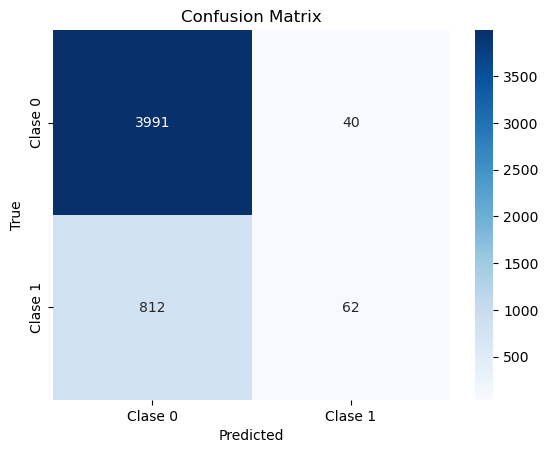

Random Forest (sin rebalanceo) - Accuracy: 0.826, AUC-ROC: 0.531, F1: 0.127


In [25]:
# Random Forest sin rebalanceo
df_model_rf_noreb=df_model_rf

# 1. Dividir el dataset en X (características) y y (variable objetivo)
X = df_model_rf_noreb.drop(columns=['status_inf'])  # Eliminar la columna objetivo
y = df_model_rf_noreb['status_inf']  # Columna objetivo

# 2. Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 5. Imprimir el reporte de clasificación (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calcular las métricas
accuracy_rf = accuracy_score(y_test, y_pred)
auc_roc_rf = roc_auc_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Imprimir los resultados
print(f"Random Forest (sin rebalanceo) - Accuracy: {accuracy_rf:.3f}, AUC-ROC: {auc_roc_rf:.3f}, F1: {f1_rf:.3f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      4031
           1       0.34      0.58      0.43       874

    accuracy                           0.73      4905
   macro avg       0.62      0.67      0.62      4905
weighted avg       0.79      0.73      0.75      4905



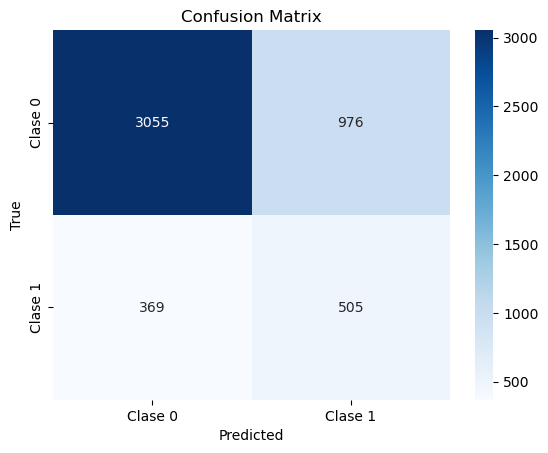

Random Forest (sin rebalanceo) - Accuracy: 0.726, AUC-ROC: 0.668, F1: 0.429


In [26]:
# Random Forest con rebalanceo

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_model_rf_reb=df_model_rf


# 1. Dividir el dataset en X (características) y y (variable objetivo)
X = df_model_rf.drop(columns=['status_inf'])  # Eliminar la columna objetivo
y = df_model_rf['status_inf']  # Columna objetivo

# 2. Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Usar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Crear y entrenar el modelo Random Forest con ajuste de pesos
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Ajuste de class_weight
rf_model.fit(X_train_resampled, y_train_resampled)

# 5. Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 6. Ajustar el umbral de decisión para mejorar recall de la clase 1
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
y_pred_adjusted = (y_proba > 0.3).astype(int)  # Ajustar el umbral de 0.5 a 0.3

# 7. Imprimir el reporte de clasificación (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

# 8. Matriz de confusión
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calcular las métricas
accuracy_rf = accuracy_score(y_test, y_pred_adjusted)
auc_roc_rf = roc_auc_score(y_test, y_pred_adjusted)
f1_rf = f1_score(y_test, y_pred_adjusted)

# Imprimir los resultados
print(f"Random Forest (sin rebalanceo) - Accuracy: {accuracy_rf:.3f}, AUC-ROC: {auc_roc_rf:.3f}, F1: {f1_rf:.3f}")

c:\Users\sergio.cuadros\miniconda3\envs\xgbenv311\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


=== Mejores hiperparámetros (GridSearch) ===
{'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}

=== Umbral que maximiza F1 (test): 0.355 ===

=== Classification Report (umbral ajustado) ===
              precision    recall  f1-score   support

     Clase 0     0.8969    0.7378    0.8096      4031
     Clase 1     0.3348    0.6087    0.4320       874

    accuracy                         0.7148      4905
   macro avg     0.6158    0.6732    0.6208      4905
weighted avg     0.7967    0.7148    0.7423      4905



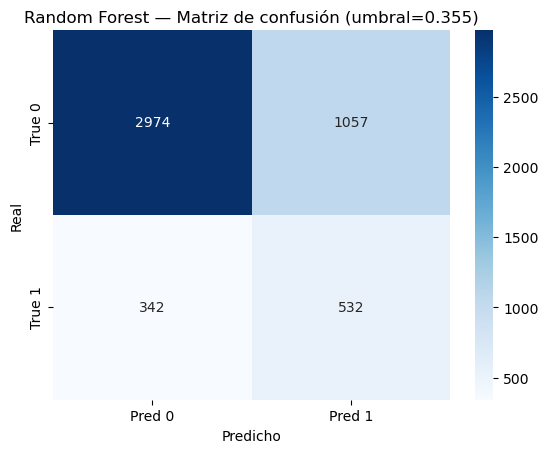

Random Forest + SMOTE (umbral=0.355) - Accuracy: 0.715, AUC-ROC: 0.740, AUC-PR: 0.362, F1: 0.432


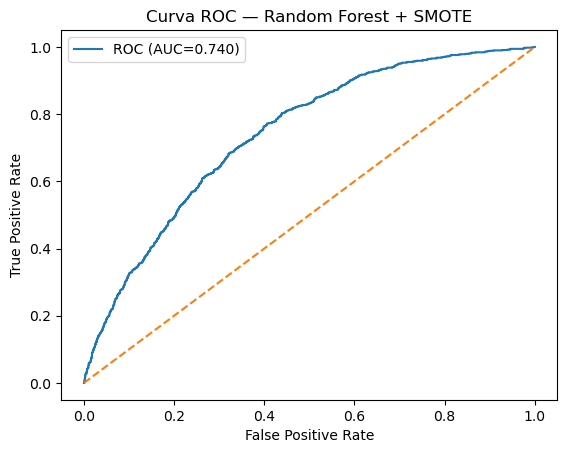

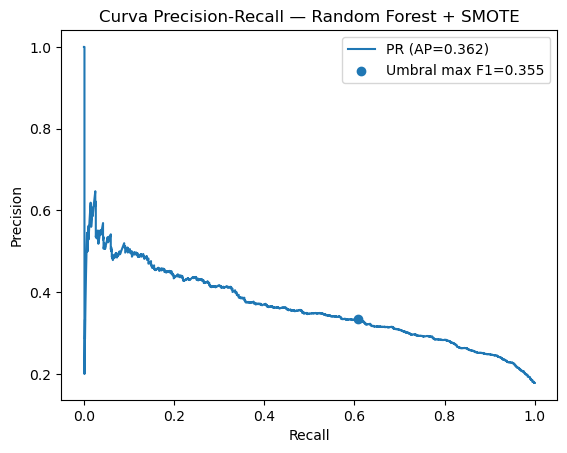

In [27]:
# Random Forest con SMOTE, GridSearch y ajuste de umbral
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score,
    f1_score, average_precision_score, precision_recall_curve, roc_curve
)
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# =========================
# 1) Split estratificado
# =========================
X = df_model_rf.drop(columns=['status_inf'])
y = df_model_rf['status_inf']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# =========================
# 2) SMOTE solo en train
# =========================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# =========================
# 3) GridSearchCV para RF
# =========================
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [5, 8, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    rf,
    param_grid=param_grid,
    scoring='average_precision',  # mide recall+precision en minoritarios
    cv=3,
    n_jobs=-1,
    verbose=0
)

grid.fit(X_train_res, y_train_res)

print("=== Mejores hiperparámetros (GridSearch) ===")
print(grid.best_params_)
rf_best = grid.best_estimator_

# =========================
# 4) Entrenar modelo final
# =========================
rf_best.fit(X_train_res, y_train_res)
y_proba = rf_best.predict_proba(X_test)[:, 1]

# =========================
# 5) Ajuste de umbral
# =========================
prec, rec, thr = precision_recall_curve(y_test, y_proba)
f1s = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_thr = thr[best_idx] if best_idx < len(thr) else 0.5

THRESHOLD = best_thr
y_pred_adj = (y_proba >= THRESHOLD).astype(int)

print(f"\n=== Umbral que maximiza F1 (test): {THRESHOLD:.3f} ===\n")

# =========================
# 6) Métricas finales
# =========================
print("=== Classification Report (umbral ajustado) ===")
print(classification_report(y_test, y_pred_adj, target_names=["Clase 0", "Clase 1"], digits=4))

cm = confusion_matrix(y_test, y_pred_adj)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"])
plt.title(f"Random Forest — Matriz de confusión (umbral={THRESHOLD:.3f})")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

accuracy_rf = accuracy_score(y_test, y_pred_adj)
auc_roc_rf = roc_auc_score(y_test, y_proba)
auc_pr_rf  = average_precision_score(y_test, y_proba)
f1_rf      = f1_score(y_test, y_pred_adj)

print(f"Random Forest + SMOTE (umbral={THRESHOLD:.3f}) - "
      f"Accuracy: {accuracy_rf:.3f}, AUC-ROC: {auc_roc_rf:.3f}, AUC-PR: {auc_pr_rf:.3f}, F1: {f1_rf:.3f}")

# =========================
# 7) Curvas ROC y PR
# =========================
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={auc_roc_rf:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC — Random Forest + SMOTE")
plt.legend()
plt.show()

plt.figure()
plt.plot(rec, prec, label=f"PR (AP={auc_pr_rf:.3f})")
plt.scatter(rec[best_idx], prec[best_idx], marker='o', label=f"Umbral max F1={best_thr:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall — Random Forest + SMOTE")
plt.legend()
plt.show()


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, f1_score, average_precision_score

logit = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
logit.fit(X_train, y_train)

y_proba_logit = logit.predict_proba(X_test)[:, 1]
y_pred_logit = (y_proba_logit >= 0.5).astype(int)

print("=== LOGIT ===")
print(classification_report(y_test, y_pred_logit, digits=4))

print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_logit):.3f}")
print(f"AUC-PR: {average_precision_score(y_test, y_proba_logit):.3f}")
print(f"F1: {f1_score(y_test, y_pred_logit):.3f}")


=== LOGIT ===
              precision    recall  f1-score   support

           0     0.9060    0.6646    0.7667      4031
           1     0.3060    0.6819    0.4224       874

    accuracy                         0.6677      4905
   macro avg     0.6060    0.6733    0.5946      4905
weighted avg     0.7991    0.6677    0.7054      4905

AUC-ROC: 0.739
AUC-PR: 0.383
F1: 0.422


c:\Users\sergio.cuadros\miniconda3\envs\xgbenv311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# ===============================================
# LOGIT + INTERACCIONES (grado 2) + LASSO (L1)
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    classification_report, accuracy_score, roc_auc_score, average_precision_score,
    f1_score, precision_recall_curve, roc_curve
)

# ---------- 0) Datos ----------
df = df_model_xgb  # <-- cambia aquí si quieres usar otro DF
X = df.drop(columns=['status_inf'])
y = df['status_inf']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ---------- 1) Pipeline: Interacciones + Escalado + Logit L1 con CV ----------
pipe_lasso = Pipeline([
    ('poly',   PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logit',  LogisticRegressionCV(
        Cs=10,                 # grid de C (inversa de lambda)
        cv=5,                  # validación cruzada
        penalty='l1',          # LASSO
        solver='saga',         # necesario para L1
        scoring='average_precision',  # robusto con desbalance
        class_weight='balanced',
        max_iter=5000,
        n_jobs=-1,
        random_state=42
    ))
])

pipe_lasso.fit(X_train, y_train)

# ---------- 2) Probabilidades y predicción ----------
y_proba = pipe_lasso.predict_proba(X_test)[:, 1]
y_pred_05 = (y_proba >= 0.5).astype(int)

# ---------- 3) Ajuste de umbral que maximiza F1 ----------
prec, rec, thr = precision_recall_curve(y_test, y_proba)
f1s = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1s)
best_thr = thr[best_idx] if best_idx < len(thr) else 0.5
y_pred_opt = (y_proba >= best_thr).astype(int)

# ---------- 4) Métricas ----------
def resumen(y_true, y_score, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_score)
    ap  = average_precision_score(y_true, y_score)
    f1  = f1_score(y_true, y_pred)
    print(f"\n[{name}] Acc: {acc:.3f} | AUC-ROC: {auc:.3f} | AUC-PR: {ap:.3f} | F1: {f1:.3f}")
    print(classification_report(y_true, y_pred, digits=4))

print("=== LOGIT + Interacciones + LASSO (umbral=0.50) ===")
resumen(y_test, y_proba, y_pred_05, "LASSO-INT@0.50")

print(f"\nUmbral que maximiza F1: {best_thr:.3f} (F1={f1s[best_idx]:.3f})")
print("=== LOGIT + Interacciones + LASSO (umbral óptimo) ===")
resumen(y_test, y_proba, y_pred_opt, "LASSO-INT@opt")

# ---------- 5) Matriz de confusión ----------
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_opt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title(f"Matriz de confusión — LASSO-INT (umbral={best_thr:.3f})")
plt.xlabel('Predicho'); plt.ylabel('Real'); plt.show()

# ---------- 6) Curvas ROC y Precision-Recall ----------
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc_score(y_test, y_proba):.3f})")
plt.plot([0,1],[0,1],'--',c='gray')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Curva ROC — Logit Interacciones + LASSO")
plt.legend(); plt.show()

plt.figure()
plt.plot(rec, prec, label=f"PR (AP={average_precision_score(y_test, y_proba):.3f})")
plt.scatter(rec[best_idx], prec[best_idx], color='black', label=f"Umbral max F1={best_thr:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Curva Precision-Recall — Logit Interacciones + LASSO")
plt.legend(); plt.show()

# ---------- 7) Coeficientes retenidos (no-cero) ----------
logit_cv = pipe_lasso.named_steps['logit']
poly = pipe_lasso.named_steps['poly']
feature_names = poly.get_feature_names_out(X.columns)

coef = logit_cv.coef_.ravel()  # clase positiva
df_coef = pd.DataFrame({'feature': feature_names, 'coef': coef})
df_coef_nz = df_coef[df_coef['coef'] != 0].copy().sort_values('coef', ascending=False)

print("\nTop 15 coeficientes positivos (mayor riesgo):")
print(df_coef_nz.head(15).to_string(index=False))

print("\nTop 15 coeficientes negativos (protector):")
print(df_coef_nz.tail(15).sort_values('coef').to_string(index=False))


KeyboardInterrupt: 

#### Corriendo ahora el Lasso sobre el dataset post std treatment:


In [21]:
df_lasso = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_lasso = df_model_rf.dropna()
df_lasso_status_inf = df_lasso['status_inf']


In [22]:
# X = df_lasso.drop(columns=['status_inf'])
#y = df_lasso['status_inf']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#lasso = Lasso(alpha=1.0)
#lasso.fit(X_train, y_train)
#coef_abs = np.abs(lasso.coef_)

#weights = 1 / (coef_abs + 1e-5)  

#lasso_adaptive = Lasso(alpha=1.0)
#lasso_adaptive.fit(X_train * weights, y_train)

# coeficientes del Lasso Adaptativo
#print(f'Coeficientes del Lasso Adaptativo: {lasso_adaptive.coef_}')

# Identificamos las variables que se mantienen (coeficientes no cercanos a cero)
#selected_features = X.columns[lasso_adaptive.coef_ != 0]
#print(f'Variables seleccionadas: {selected_features}')

# Filtramos el dataset eliminando las variables no seleccionadas
#X_selected = X[selected_features]

In [23]:
# Logit 
# df_lasso_final = pd.concat([X_selected, df_lasso_status_inf], axis=1)

#from sklearn.linear_model import LogisticRegression

#X = df_lasso_final.drop(columns=['status_inf'])  # Eliminamos la columna dependiente
#y = df_lasso_final['status_inf']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#logit_model = LogisticRegression(solver='liblinear')  # 'liblinear' es adecuado para pequeños datasets
#logit_model.fit(X_train, y_train)
#y_pred = logit_model.predict(X_test)

#print(classification_report(y_test, y_pred))
